# Customer Credit Risk Scoring Model

### **Objective:**

The goal of this project is to build a **Customer Credit Risk Scoring Model** to assess the likelihood of a customer defaulting on a loan. The model will classify customers as **low-risk** or **high-risk** based on their financial data and personal characteristics. This project is relevant for the finance industry, particularly for banks and lending institutions that need to evaluate creditworthiness before approving loans.

### **1. Problem Definition:**

Credit risk scoring helps financial institutions make informed lending decisions by estimating the likelihood of default on credit obligations. A customer’s risk score is crucial for determining whether to approve a loan, setting interest rates, or determining the credit limit.

### **2. Dataset:**

First of all, let me import some necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import assistant

%matplotlib inline

The dataset in this project is German Credit Dataset, which can be found on https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data. To import the dataset, I install `ucimlrepo` as the Python module using `pip`. As a result, the command to install the module is:

`pip install ucimlrepo`

Subsequently, I proceed some steps as follows in order to get the dataset.

In [2]:
from ucimlrepo import fetch_ucirepo 

# Fetch German Credit Data (ID: 144).
statlog_german_credit_data = fetch_ucirepo(id=144) 

# Extract features into a DataFrame.
df = statlog_german_credit_data.data.features 
# Add target values as a new column 'risk'.
df["risk"] = statlog_german_credit_data.data.targets

df.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


It looks like the dataset's columns are not well-described, as we can see that the column names are in the format of "Attribute[number]". Therefore, I'd better name these columns properly so that I'll get some insights from the data more conveniently.

In [3]:
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


According to the description, I name these columns as below.

In [4]:
# Define a list of feature column names for the DataFrame.
cols_features = [
    "account_status", "duration", "credit_history", "purpose", "credit_amount", "savings_account_or_bonds", "employment", "installment_rate",
    "status_and_sex", "other_debtors_or_guarantors", "residence", "property", "age", "other_installment_plans", "housing", "num_credits", "job", 
    "num_liable_people", "telephone", "is_foreign"
]

# Rename DataFrame columns (excluding "risk") using the defined feature names.
df = df.rename(dict(zip(list(df.drop("risk", axis=1).columns), cols_features)), axis=1)
df.head(5)

,account_status,duration,credit_history,purpose,credit_amount,savings_account_or_bonds,employment,installment_rate,status_and_sex,other_debtors_or_guarantors,...,property,age,other_installment_plans,housing,num_credits,job,num_liable_people,telephone,is_foreign,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Unfortunately, the categorical values have already been encoded before, so I'll try my best to interpret the encoded data.

### **3. Project Workflow:**

### **Step 1: Problem Understanding & Business Impact**

- **Objective**: Define the business goal. In this case, it's to predict the probability of customer default to minimize non-performing loans (NPLs).
- **Expected Outcome**: A model that can classify customers into "high-risk" or "low-risk" categories with high accuracy. The model will be evaluated based on metrics like **precision**, **recall**, **F1-score**, and **AUC-ROC**.

### **Step 2: Data Preprocessing**

- **Missing Values Handling**: Use imputation methods like mean, median, or mode for missing values in features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   account_status               1000 non-null   object
 1   duration                     1000 non-null   int64 
 2   credit_history               1000 non-null   object
 3   purpose                      1000 non-null   object
 4   credit_amount                1000 non-null   int64 
 5   savings_account_or_bonds     1000 non-null   object
 6   employment                   1000 non-null   object
 7   installment_rate             1000 non-null   int64 
 8   status_and_sex               1000 non-null   object
 9   other_debtors_or_guarantors  1000 non-null   object
 10  residence                    1000 non-null   int64 
 11  property                     1000 non-null   object
 12  age                          1000 non-null   int64 
 13  other_installment_plans      1000 

The data has no null values, but are there any outlying numerical values? Let's find out.

* **Outlier Detection:** Identify and handle outliers in features.

In [6]:
cols_w_outliers = []

for col in df.columns:
    if df[col].dtype == "int64" and assistant.has_outliers(df[col]):
        cols_w_outliers.append(col)

cols_w_outliers

['duration', 'credit_amount', 'age', 'num_credits', 'num_liable_people']

We can see that 'duration', 'credit_amount', 'age', 'num_credits', and 'num_liable_people', are the numerical columns that contain outlying values. To improve the model's performance in the future, I need to cut those outliers out. However, inspecting whether the original values outlie can potentially guide us to insights discovery. Hence, for each outliers-containing column, I create another column that saves the outlying status of each value and get rid of outlying values next.

In [7]:
for col in cols_w_outliers:
    df[f"{col}_outlies"] = assistant.get_outliers(df[col])

df.head(5)

,account_status,duration,credit_history,purpose,credit_amount,savings_account_or_bonds,employment,installment_rate,status_and_sex,other_debtors_or_guarantors,...,job,num_liable_people,telephone,is_foreign,risk,duration_outlies,credit_amount_outlies,age_outlies,num_credits_outlies,num_liable_people_outlies
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A173,1,A192,A201,1,False,False,True,False,False
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A173,1,A191,A201,2,True,False,False,False,False
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A172,2,A191,A201,1,False,False,False,False,True
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A173,2,A191,A201,1,False,False,False,False,True
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A173,2,A191,A201,2,False,False,False,False,True


Here, the saving columns have been included into the dataset, so let's see what each of the the outlying ones' minimum value is.

In [8]:
for col in cols_w_outliers:
    print(f"{col}: {min(df[df[f'{col}_outlies']][col].unique())}")

duration: 45
credit_amount: 7966
age: 65
num_credits: 4
num_liable_people: 2


To get rid of outliers, I decide to replace their values to the median value of the column (outliers excluded in the calculation process). Finally, we shall get the data without any outliers anymore.

In [9]:
for col in cols_w_outliers:
    col_outlies = f"{col}_outlies"
    median = df[~df[col_outlies]][col].median()
    df[col] = df[[col, col_outlies]].apply(lambda v: v[0] if not v[1] else median, axis=1)
    print(f"{col}: impute outliers with {median}")

duration: impute outliers with 18.0
credit_amount: impute outliers with 2145.5
age: impute outliers with 33.0
num_credits: impute outliers with 1.0
num_liable_people: impute outliers with 1.0


C:\Users\User\AppData\Local\Temp\ipykernel_10252\1417718912.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[col] = df[[col, col_outlies]].apply(lambda v: v[0] if not v[1] else median, axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_10252\1417718912.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[col] = df[[col, col_outlies]].apply(lambda v: v[0] if not v[1] else median, axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_10252\1417718912.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 

* **Feature Scaling:** Scale continuous features to improve model performance.

In [10]:
cols_scl = {}

for col in df.columns:
    if assistant.is_continuous(df[col]):
        cols_scl[col] = assistant.distribution_is_normal(df[col])

cols_scl

{'credit_amount': False}

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms_md = mms.fit(df[["credit_amount"]])
df_ca_scl = pd.DataFrame(mms_md.transform(df[["credit_amount"]]), columns=["credit_amount_scaled"])
df = pd.concat([df, df_ca_scl], axis=1) \
    .drop("credit_amount", axis=1)

df.head(5)

,account_status,duration,credit_history,purpose,savings_account_or_bonds,employment,installment_rate,status_and_sex,other_debtors_or_guarantors,residence,...,num_liable_people,telephone,is_foreign,risk,duration_outlies,credit_amount_outlies,age_outlies,num_credits_outlies,num_liable_people_outlies,credit_amount_scaled
0,A11,6.0,A34,A43,A65,A75,4,A93,A101,4,...,1.0,A192,A201,1,False,False,True,False,False,0.120414
1,A12,18.0,A32,A43,A61,A73,2,A92,A101,2,...,1.0,A191,A201,2,True,False,False,False,False,0.746986
2,A14,12.0,A34,A46,A61,A74,2,A93,A101,3,...,1.0,A191,A201,1,False,False,False,False,True,0.241876
3,A11,42.0,A32,A42,A61,A74,2,A93,A103,4,...,1.0,A191,A201,1,False,False,False,False,True,1.000000
4,A11,24.0,A33,A40,A61,A73,3,A93,A101,4,...,1.0,A191,A201,2,False,False,False,False,True,0.605346


* **Class Imbalance Handling:** Credit risk datasets often suffer from class imbalance (more low-risk customers than high-risk). Address this with techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling.

In [12]:
df["risk"].value_counts()

risk
1    700
2    300
Name: count, dtype: int64

Since the values of the risk column can be either low (1) or high (2), I think it would be more intuitive if I determine its values to be low (0) and high (1) instead. Therefore, the risk column is transformed as mentioned.

In [13]:
df["risk"] = df["risk"].apply(lambda v: v-1)
df["risk"].value_counts()

risk
0    700
1    300
Name: count, dtype: int64

We can see that there are 700 rows with low risk, which makes the low value of risk the majority class, while there are 300 rows with high risk, and it causes the high risk value the minority one. Ideally, the balanced data should contain the equal number of data points in both classes. However, this truth doesn't always work with some models. Having the equal number of data may result them to be overfitting or underfitting. Therefore, data balancing should be the process involved in the model experiment.

To make it possible, I have my own custom data transformer that implements the concept of transformers in scikit-learn. It's called `BinaryDataBalancer`, which is specifically used for tuning the number of data points based on the ratio between the positive class and the negative class. Moreover, we can specify the number of data points in only one of both classes. (If we specify the number of data points in the positive class, we cannot specify the number of data points in the negative class. Likewise for the negative class.) The use of `BinaryDataBalancer` will also be demonstrated next.

### **Step 3: Feature Engineering**

- **New Features**: Create meaningful features such as:
  - **Credit Amount per Duration:** This feature captures how much credit a customer takes relative to the loan duration. Customers borrowing large amounts over short periods may pose higher risks.
  - **Age Group:** Create age groups, as risk may vary by age (e.g., younger or older borrowers might be higher risk).
  - **Duration and Installment Rate Interaction:** Long loan durations with high installment rates may indicate customers stretching their financial capabilities.

Since I need to implement feature engineering after each data balancing trials, I make a custom transformer, `FeatureExtractor`, which performs these jobs.

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureExtractor(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        
        def group_by_age(age):
            if age < 25:
                return 0
            elif age < 40:
                return 1
            elif age < 60:
                return 2
            else:
                return 3

        X = X.copy()
        X["credit_amt_p_dur"] = X["credit_amount_scaled"]/X["duration"]
        X["age_gr"] = X["age"].apply(group_by_age)
        X["dur_instm_rate_interaction"] = X["duration"]*X["installment_rate"]
        return X

In [15]:
set(FeatureExtractor().fit(df).transform(df).columns) - set(df.columns)

{'age_gr', 'credit_amt_p_dur', 'dur_instm_rate_interaction'}

- **Feature Selection:** Use methods like Random Forest Feature Importance or Recursive Feature Elimination (RFE) to select the most relevant features for the model.

First of all, I visualize the correlation of each numerical variable pairs to see if there are any columns I can remove.

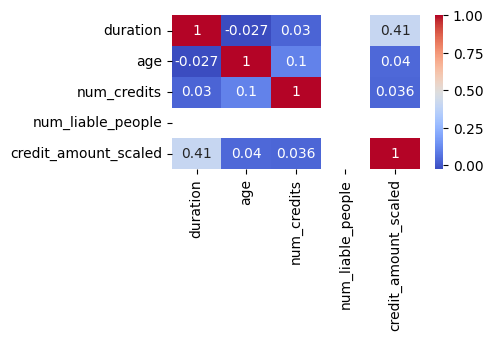

In [16]:
ax = plt.figure(figsize=(4, 2))
sns.heatmap(assistant.corr_numerical(df, [col for col in df.columns if df[col].dtype in [int, float]]), cmap="coolwarm", annot=True)
plt.show()

Numerical variables don't seem to have correlations to each other, so I should keep them all. Then, I explore the correlation of categorical variables using my assistant library's corr_categorical. It uses Chi-Square test to verify whether both variables are correlated to each other and then calculates the covariance value using Cramer V's correlation.

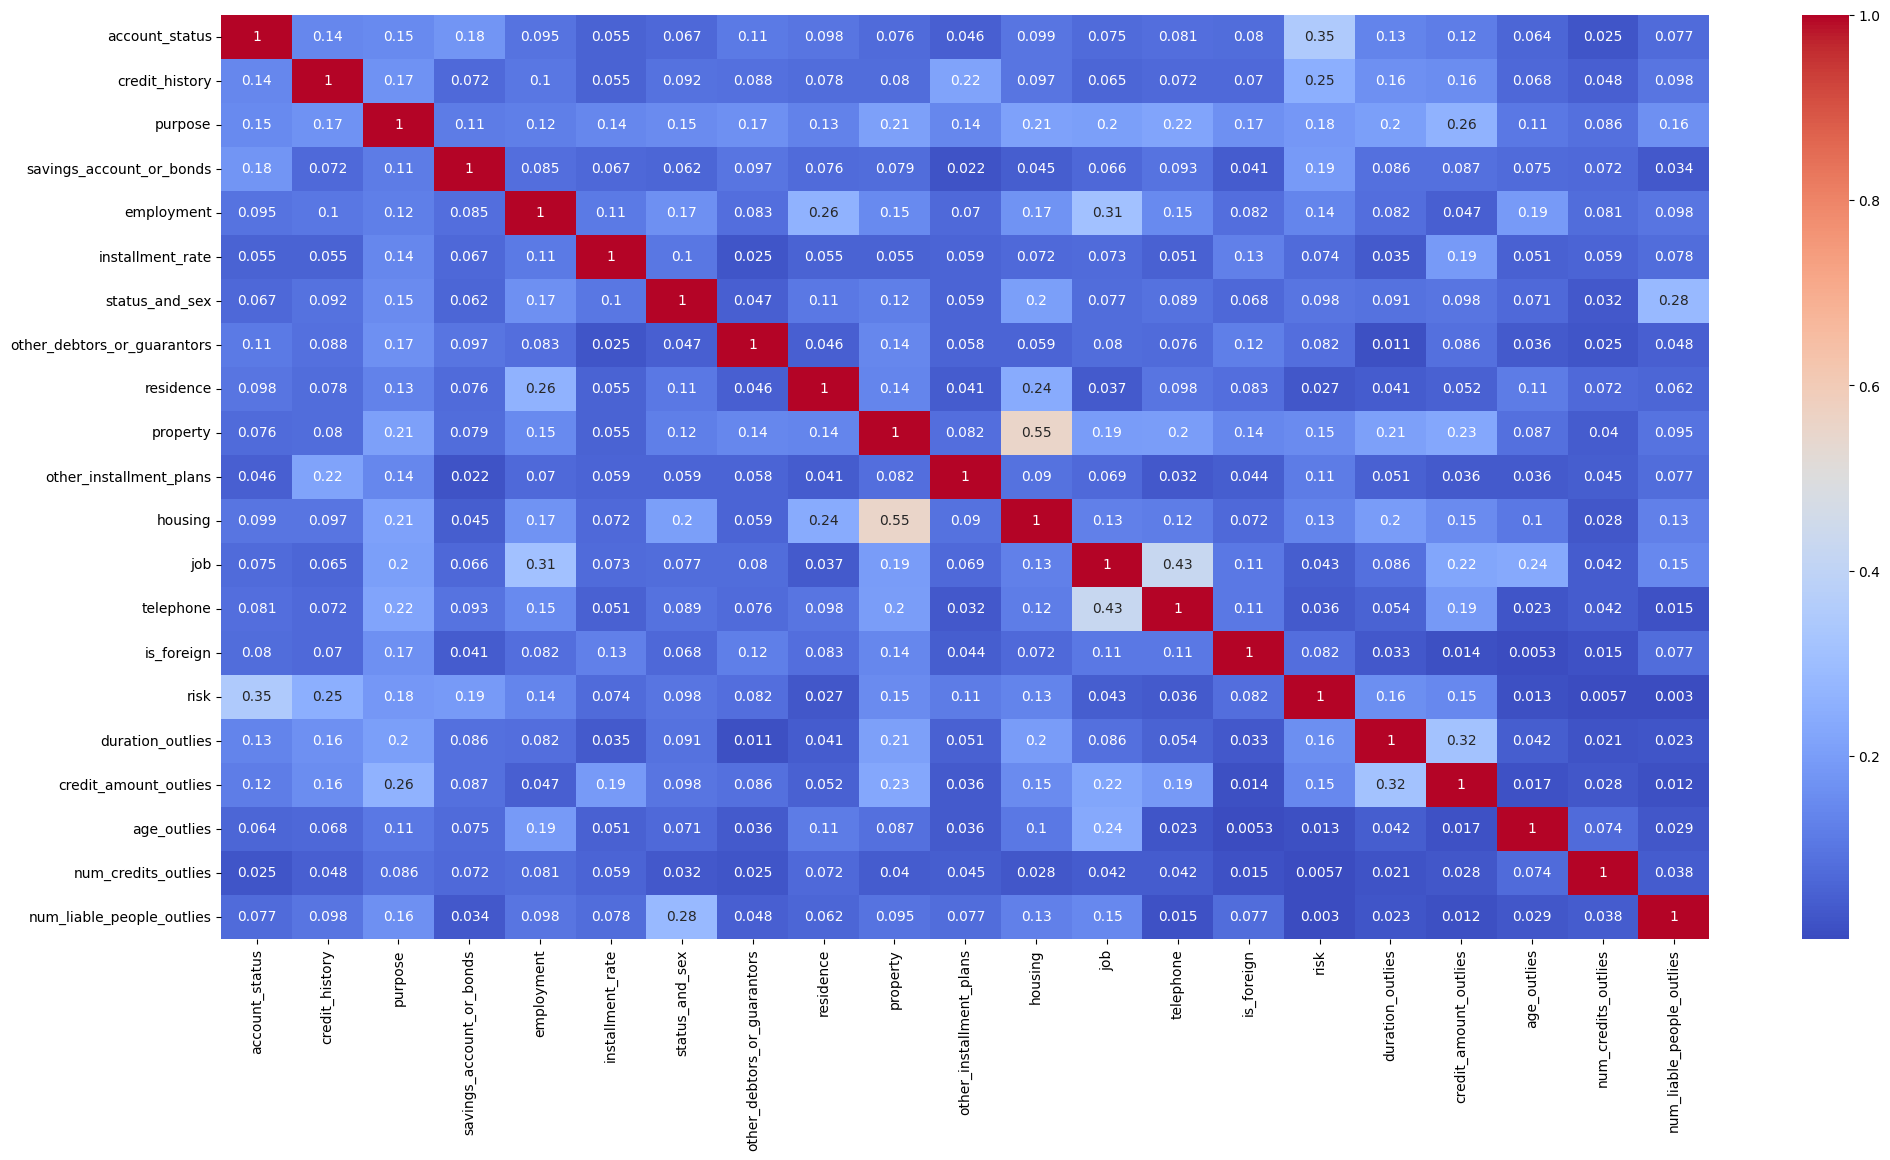

In [17]:
ax = plt.figure(figsize=(24, 12))
sns.heatmap(assistant.corr_categorical(df, [col for col in df.columns if df[col].dtype not in [int, float]]), cmap="coolwarm", annot=True)
plt.show()

We can see that there's no correlation between each pair of columns even in the categorical variables. As a result, I head back to the feature importance from a random forest model.